**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

For kappa = 1.0, the maximum profit is: 0.25
For kappa = 2.0, the maximum profit is: 1.0


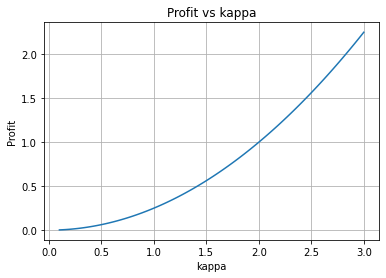

In [4]:
eta=0.5
w=1.0
kappa_values = [1.0, 2.0]

for kappa in kappa_values:
    profit = problem.calculate_profit_a(kappa,eta=0.5,w=1)
    print(f"For kappa = {kappa}, the maximum profit is: {profit}")

kappa_values = np.linspace(0.1, 3.0, 100)  # Generate 100 values between 0.1 and 3.0

profits = [problem.calculate_profit_a(kappa,eta=0.5,w=1) for kappa in kappa_values]

# Plotting
plt.plot(kappa_values, profits)
plt.xlabel('kappa')
plt.ylabel('Profit')
plt.title('Profit vs kappa')
plt.grid(True)
plt.show()

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [15]:
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)

def calculate_profit_b(kappa, ell,t):
    ell = (((1 - eta) * kappa) / w) ** (1 / eta)
    adjustment_cost = iota 
    price = kappa * ell ** (-eta)
    profit = price * ell - w * ell - adjustment_cost
    return ell, profit

def calculate_ex_post_value(shock_series):
    ell_prev = 0.0
    ex_post_value = 0.0

    for t in range(1,T+1):
        kappa = np.exp(shock_series[t-1])
        ell, profit = calculate_profit_b(kappa, ell_prev, t-1)
        ex_post_value += R ** (-(t-1)) * profit
        ell_prev = ell

    return ex_post_value

T = 120  # Planning horizon
K = 10000  # Number of random shock series

ex_ante_values = []

for k in range(K):
    shock_series = np.random.uniform(-0.5 * sigma_epsilon ** 2, sigma_epsilon, T)
    ex_post_value = calculate_ex_post_value(shock_series)
    ex_ante_values.append(ex_post_value)

ex_ante_value = np.mean(ex_ante_values)
print("Ex Ante Value (H):", ex_ante_value)


Ex Ante Value (H): 30.329554478923416


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [16]:
Delta = 0.05

def calculate_profit3(kappa, ell_prev, t, Delta):
    ell_ast = (((1 - eta) * kappa) / w) ** (1 / eta)
    adjustment_cost = iota * (abs(ell_prev - ell_ast) > Delta)
    price = kappa * ell_ast ** (-eta)
    profit = price * ell_ast - w * ell_ast - adjustment_cost
    return ell_ast, profit

def calculate_ex_post_value(shock_series):
    ell_prev = 0.0
    ex_post_value = 0.0

    for t in range(T):
        kappa = np.exp(shock_series[t])
        ell, profit = calculate_profit3(kappa, ell_prev, t, Delta)
        ex_post_value += R ** (-t) * profit
        ell_prev = ell

    return ex_post_value

T = 120  # Planning horizon
K = 1000  # Number of random shock series

ex_ante_values = []

for k in range(K):
    shock_series = np.random.uniform(-0.5 * sigma_epsilon ** 2, sigma_epsilon, T)
    ex_post_value = calculate_ex_post_value(shock_series)
    ex_ante_values.append(ex_post_value)

ex_ante_value = np.mean(ex_ante_values)
print("Ex Ante Value (H) with Delta =", Delta, ":", ex_ante_value)

Ex Ante Value (H) with Delta = 0.05 : 31.446421433189148


Answer: **Delta = 0.05 improved profitability**

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [71]:
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)


In [72]:

def calculate_profit3(kappa, ell_prev, t, Delta):
    ell_ast = (((1 - eta) * kappa) / w) ** (1 / eta)
    adjustment_cost = iota * (abs(ell_prev - ell_ast) > Delta)
    price = kappa * ell_ast ** (-eta)
    profit = price * ell_ast - w * ell_ast - adjustment_cost
    return ell_ast, profit

def calculate_ex_post_value(shock_series, Delta):
    ell_prev = 0.0
    ex_post_value = 0.0

    for t in range(T):
        kappa = np.exp(shock_series[t])
        ell, profit = calculate_profit3(kappa, ell_prev, t, Delta)
        ex_post_value += R ** (-t) * profit
        ell_prev = ell

    return ex_post_value


Optimal Delta: 0.10101010101010101
Maximum Ex Ante Value (H): 31.476186718435795


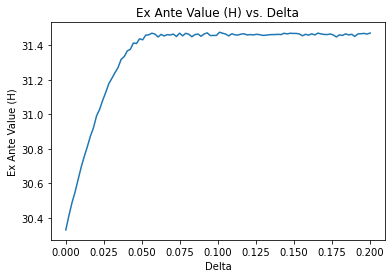

In [73]:
T = 120  # Planning horizon
K = 1000  # Number of random shock series
delta_values = np.linspace(0, 0.2, 100)
ex_ante_values = []

for delta in delta_values:
    ex_ante_sum = 0
    for k in range(K):
        shock_series = np.random.uniform(-0.5 * sigma_epsilon ** 2, sigma_epsilon, T)
        ex_post_value = calculate_ex_post_value(shock_series, delta)
        ex_ante_sum += ex_post_value
    ex_ante_value = ex_ante_sum / K
    ex_ante_values.append(ex_ante_value)

optimal_delta = delta_values[np.argmax(ex_ante_values)]
max_ex_ante_value = np.max(ex_ante_values)

print("Optimal Delta:", optimal_delta)
print("Maximum Ex Ante Value (H):", max_ex_ante_value)

# Plotting the results
plt.plot(delta_values, ex_ante_values)
plt.xlabel("Delta")
plt.ylabel("Ex Ante Value (H)")
plt.title("Ex Ante Value (H) vs. Delta")
plt.show()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



One alternative policy that could potentially improve profitability is to adjust the hairdresser's wage (w) based on the previous period's profit. The idea is to increase the wage by 5% if the previous period's profit was positive and remain unchanged it if the profit was negative. By adjusting the wage dynamically based on profitability, the salon can adapt to changing market conditions and potentially improve its overall profitability.

Here's the implementation of the alternative policy:

In [18]:
eta = 0.5
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)

In [19]:

# Function to calculate the hairdresser's wage based on previous period's profit
def calculate_wage(prev_profit):
    # Adjust the wage based on the previous period's profit
    w = 1.0 + 0.05 * np.sign(prev_profit)
    return w

# Function to calculate the profit and update the hairdresser's wage
def calculate_profit3(kappa, ell_prev, t, prev_profit):
    w = calculate_wage(prev_profit)
    ell_ast = (((1 - eta) * kappa) / w) ** (1 / eta)
    adjustment_cost = iota * (abs(ell_prev - ell_ast) > 0)
    price = kappa * ell_ast ** (-eta)
    profit = price * ell_ast - w * ell_ast - adjustment_cost
    return ell_ast, profit, w

# Function to calculate the ex ante value (H) with the alternative policy
def calculate_ex_ante_value(delta):
    ell_prev = 0.0
    ex_post_value = 0.0
    ex_ante_value = 0.0
    prev_profit = 0.0

    for t in range(T):
        kappa = np.exp(shock_series[t])
        ell, profit, wage = calculate_profit3(kappa, ell_prev, t, prev_profit)
        ex_post_value += R ** (-t) * profit
        ex_ante_value += R ** (-t) * profit
        ell_prev = ell
        prev_profit = profit

    return ex_ante_value


In [20]:

T = 120  # Planning horizon
K = 1000  # Number of random shock series

delta = 0.05  # Delta value for the alternative policy
ex_ante_sum = 0.0

for k in range(K):
    shock_series = np.random.uniform(-0.5 * sigma_epsilon ** 2, sigma_epsilon, T)
    ex_ante_value = calculate_ex_ante_value(delta)
    ex_ante_sum += ex_ante_value

ex_ante_value = ex_ante_sum / K

print("Ex Ante Value (H) with the alternative policy:", ex_ante_value)

Ex Ante Value (H) with the alternative policy: 28.84959353547414


The reason for the lower ex ante value under the alternative policy could be attributed to the fact that adjusting the wage based on profitability may introduce additional volatility or instability in the system. By increasing the wage when the profit is positive, the salon incurs higher labor costs, which may not be fully offset by the increased profitability. On the other hand, keeping the wage unchanged when the profit is negative does not allow for immediate cost reductions to mitigate the loss.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [21]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [67]:
def griewank(x):
    if isinstance(x, float):
        return griewank_([x])
    return griewank_(x)

def griewank_(x):
    x1 = x[0]
    x2 = 0 if len(x) < 2 else x[1]  # Handle the case when len(x) < 2
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(f, bounds, tau, K_under, K):
    """
    Args:
        f: The objective function to be optimized.
        bounds: The bounds of the search space.
        tau: The tolerance for the optimal solution.
        K_under: The number of warm-up iterations.
        K: The maximum number of iterations.
    Returns:
        The optimal solution.
    """
    np.random.seed(100)
    # Initialize the optimal solution.
    a_star = None
    # Initialize a list to store the effective initial guesses.
    initial_guesses = []
    # Initialize a_k0 outside of the if statement
    a_k0 = None
    # Iterate over the iterations.
    for k in range(K):
        # Draw a random point.
        a_k = np.random.uniform(bounds[0], bounds[1])
        # If this is the first iteration, or if the current point is better than the
        # previous best point, set it as the new best point.
        if k == 0 or f(a_k) < f(a_star):
            a_star = a_k
        # If this is not the first iteration, calculate the probability of moving
        # towards the current best point.
        if k > K_under:
            P_k = 0.50 * (2 / (1 + np.exp((k - K_under) / 100)))
            # If the probability is greater than 0, move towards the current best point.
            if P_k > 0:
                a_k0 = P_k * a_k + (1 - P_k) * a_star
                initial_guesses.append(a_k0)
        # Run the optimizer with the current point as the initial guess.
        if a_k0 is not None:
            a_k_star = optimizer(a_k0)  # step.E
            # If the new point is better than the previous best point, set it as the new
            # best point.
            if f(a_k_star) < f(a_star):
                a_star = a_k_star
        # If the new point is within the tolerance, return it.
        if f(a_star) < tau:
            return a_star, initial_guesses
    # Return the best point found.
    return a_star, initial_guesses

def optimizer(x0):
    # Placeholder optimization algorithm, replace with your chosen optimizer
    res = minimize(griewank, x0, method='BFGS', tol=tau)
    return res.x


In [ ]:

# Set the parameters
bounds = [-600, 600]
tau = 1e-8
K_under = 10
K = 1000

# Run the refined global optimizer
optimal_solution, initial_guesses = refined_global_optimizer(griewank, bounds, tau, K_under, K)

# Print the optimal solution
print("Optimal solution:", optimal_solution)

# Print the effective initial guesses for each iteration
for k, guess in enumerate(initial_guesses):
    print("Iteration", k + K_under, "- Initial guess:", guess)


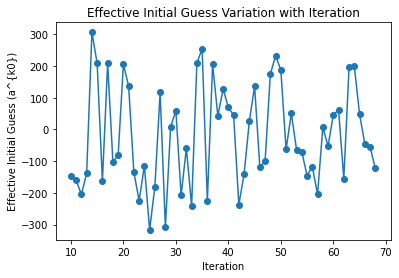

In [68]:
# Define the iteration numbers
iteration_numbers = range(K_under, K)

padding = len(iteration_numbers) - len(initial_guesses)
initial_guesses_padded = initial_guesses + [None] * padding

# Plot the effective initial guesses against the iteration numbers
plt.plot(iteration_numbers, initial_guesses_padded, '-o')
plt.xlabel("Iteration")
plt.ylabel("Effective Initial Guess (a^{k0})")
plt.title("Effective Initial Guess Variation with Iteration")
plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [69]:
# Set the parameters
bounds = [-600, 600]
tau = 1e-8
K_under = 100
K = 1000

# Run the refined global optimizer
optimal_solution, initial_guesses = refined_global_optimizer(griewank, bounds, tau, K_under, K)

# Print the optimal solution
print("Optimal solution:", optimal_solution)

# Print the effective initial guesses for each iteration
for k, guess in enumerate(initial_guesses):
    print("Iteration", k + K_under, "- Initial guess:", guess)


Optimal solution: [-1.16241682e-08]
Iteration 100 - Initial guess: 170.1954028951041
Iteration 101 - Initial guess: 68.82639034417377
Iteration 102 - Initial guess: -109.57318595293034
Iteration 103 - Initial guess: 119.59246819106403
Iteration 104 - Initial guess: 213.71813878483152
Iteration 105 - Initial guess: 76.29569771496577
Iteration 106 - Initial guess: 282.6911392172417
Iteration 107 - Initial guess: 277.8593110766944
Iteration 108 - Initial guess: -187.5849249322491
Iteration 109 - Initial guess: -268.37870582494685
Iteration 110 - Initial guess: -188.93120163192953
Iteration 111 - Initial guess: 242.32463315040678
Iteration 112 - Initial guess: 257.9367206991238
Iteration 113 - Initial guess: -157.80722449287163
Iteration 114 - Initial guess: -73.91741269460493
Iteration 115 - Initial guess: 30.779199181014608
Iteration 116 - Initial guess: -121.75761242216686
Iteration 117 - Initial guess: -17.9658749893749
Iteration 118 - Initial guess: 110.11676678279194
Iteration 119 - 

c:\Users\masat\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


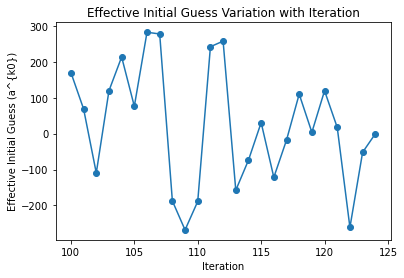

In [70]:
# Define the iteration numbers
iteration_numbers = range(K_under, K)

padding = len(iteration_numbers) - len(initial_guesses)
initial_guesses_padded = initial_guesses + [None] * padding

# Plot the effective initial guesses against the iteration numbers
plt.plot(iteration_numbers, initial_guesses_padded, '-o')
plt.xlabel("Iteration")
plt.ylabel("Effective Initial Guess (a^{k0})")
plt.title("Effective Initial Guess Variation with Iteration")
plt.show()

In general, increasing the value of K_under can potentially lead to faster convergence, as it allows for a longer warm-up period where the algorithm explores the search space more extensively before focusing on the current best point.

However, setting a larger K_under value may also result in slower convergence in some cases. Actually, in this case, K_under=100 changes the convergence slow.